In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
%matplotlib notebook

In [4]:
cameras_file = os.path.join("../Desktop/Archive", "red-light-camera-locations.csv")
cameras_file = pd.read_csv(cameras_file)
violations_file = os.path.join("../Desktop/Archive","red-light-camera-violations.csv")
violations_file = pd.read_csv(violations_file)

In [8]:
cameras_file.columns

Index(['Intersection', 'First Approach', 'Second Approach', 'Third Approach',
       'Date', 'Latitude', 'Longitude', 'Location',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards'],
      dtype='object')

In [10]:
violations_file.columns

Index(['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards'],
      dtype='object')

In [32]:
speed_cam_locs_df = pd.DataFrame(cameras_file)
red_violations_df = pd.DataFrame(violations_file)

In [40]:
num_cams = speed_cam_locs_df.groupby("Wards")["Intersection"].count()

In [39]:
wards = [
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36, 
37,  
38, 
40,
41,
44,
45,
46,
48,
49,
50]

In [42]:
speed_cams = pd.DataFrame({
    "Ward Number" : wards,
    "Speed Cams per Ward": num_cams
})
speed_cams.head()

,Ward Number,Speed Cams per Ward
Wards,,
1,1,2
2,2,2
3,3,2
4,4,1
5,5,1


In [44]:
red_violations_df.columns

Index(['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards'],
      dtype='object')

In [47]:
violations = pd.DataFrame(red_violations_df.groupby("Wards")["VIOLATIONS"].sum())
merge_df = pd.merge(violations, speed_cams, on="Wards")
merge_df = merge_df[["Ward Number", "Speed Cams per Ward", "VIOLATIONS"]]
merge_df.head()

,Ward Number,Speed Cams per Ward,VIOLATIONS
Wards,,,
1.0,1,2,33960
2.0,2,2,25681
3.0,3,2,34327
4.0,4,1,30204
5.0,5,1,21369


In [64]:
merge_df = merge_df.rename(columns={
    "VIOLATIONS": "Violations",
    "Speed Cams per Ward": "Red Light Cams per Ward"
})
merge_df.head()

,Ward Number,Red Light Cams per Ward,Violations
Wards,,,
1.0,1,2,33960
2.0,2,2,25681
3.0,3,2,34327
4.0,4,1,30204
5.0,5,1,21369


In [66]:
cameras_file = os.path.join("../Desktop/Archive", "ward_offices_locs_alt.csv")
ward_offices_df = pd.read_csv(cameras_file)
clean_df = pd.merge(merge_df, ward_offices_df, on="Ward Number")
clean_df.head()

,Ward Number,Red Light Cams per Ward,Violations,Latitude,Longitude,Neighborhoods,Navigator
0,1,2,33960,41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side"
1,2,2,25681,41.908759,-87.668029,"Near North Side, Lincoln Park, Wicker Park, Uk...","N Side, W and Near W Side"
2,3,2,34327,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side
3,4,1,30204,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
4,5,1,21369,41.766729,-87.568063,"Indian Village, Hyde Park, Jackson Park, South...",S Side


In [68]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    print(f"pvalue: {round(pvalue,2)}")
    return line_eq

In [70]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

In [72]:
clean_df.head()

,Ward Number,Red Light Cams per Ward,Violations,Latitude,Longitude,Neighborhoods,Navigator
0,1,2,33960,41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side"
1,2,2,25681,41.908759,-87.668029,"Near North Side, Lincoln Park, Wicker Park, Uk...","N Side, W and Near W Side"
2,3,2,34327,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side
3,4,1,30204,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
4,5,1,21369,41.766729,-87.568063,"Indian Village, Hyde Park, Jackson Park, South...",S Side


<IPython.core.display.Javascript object>


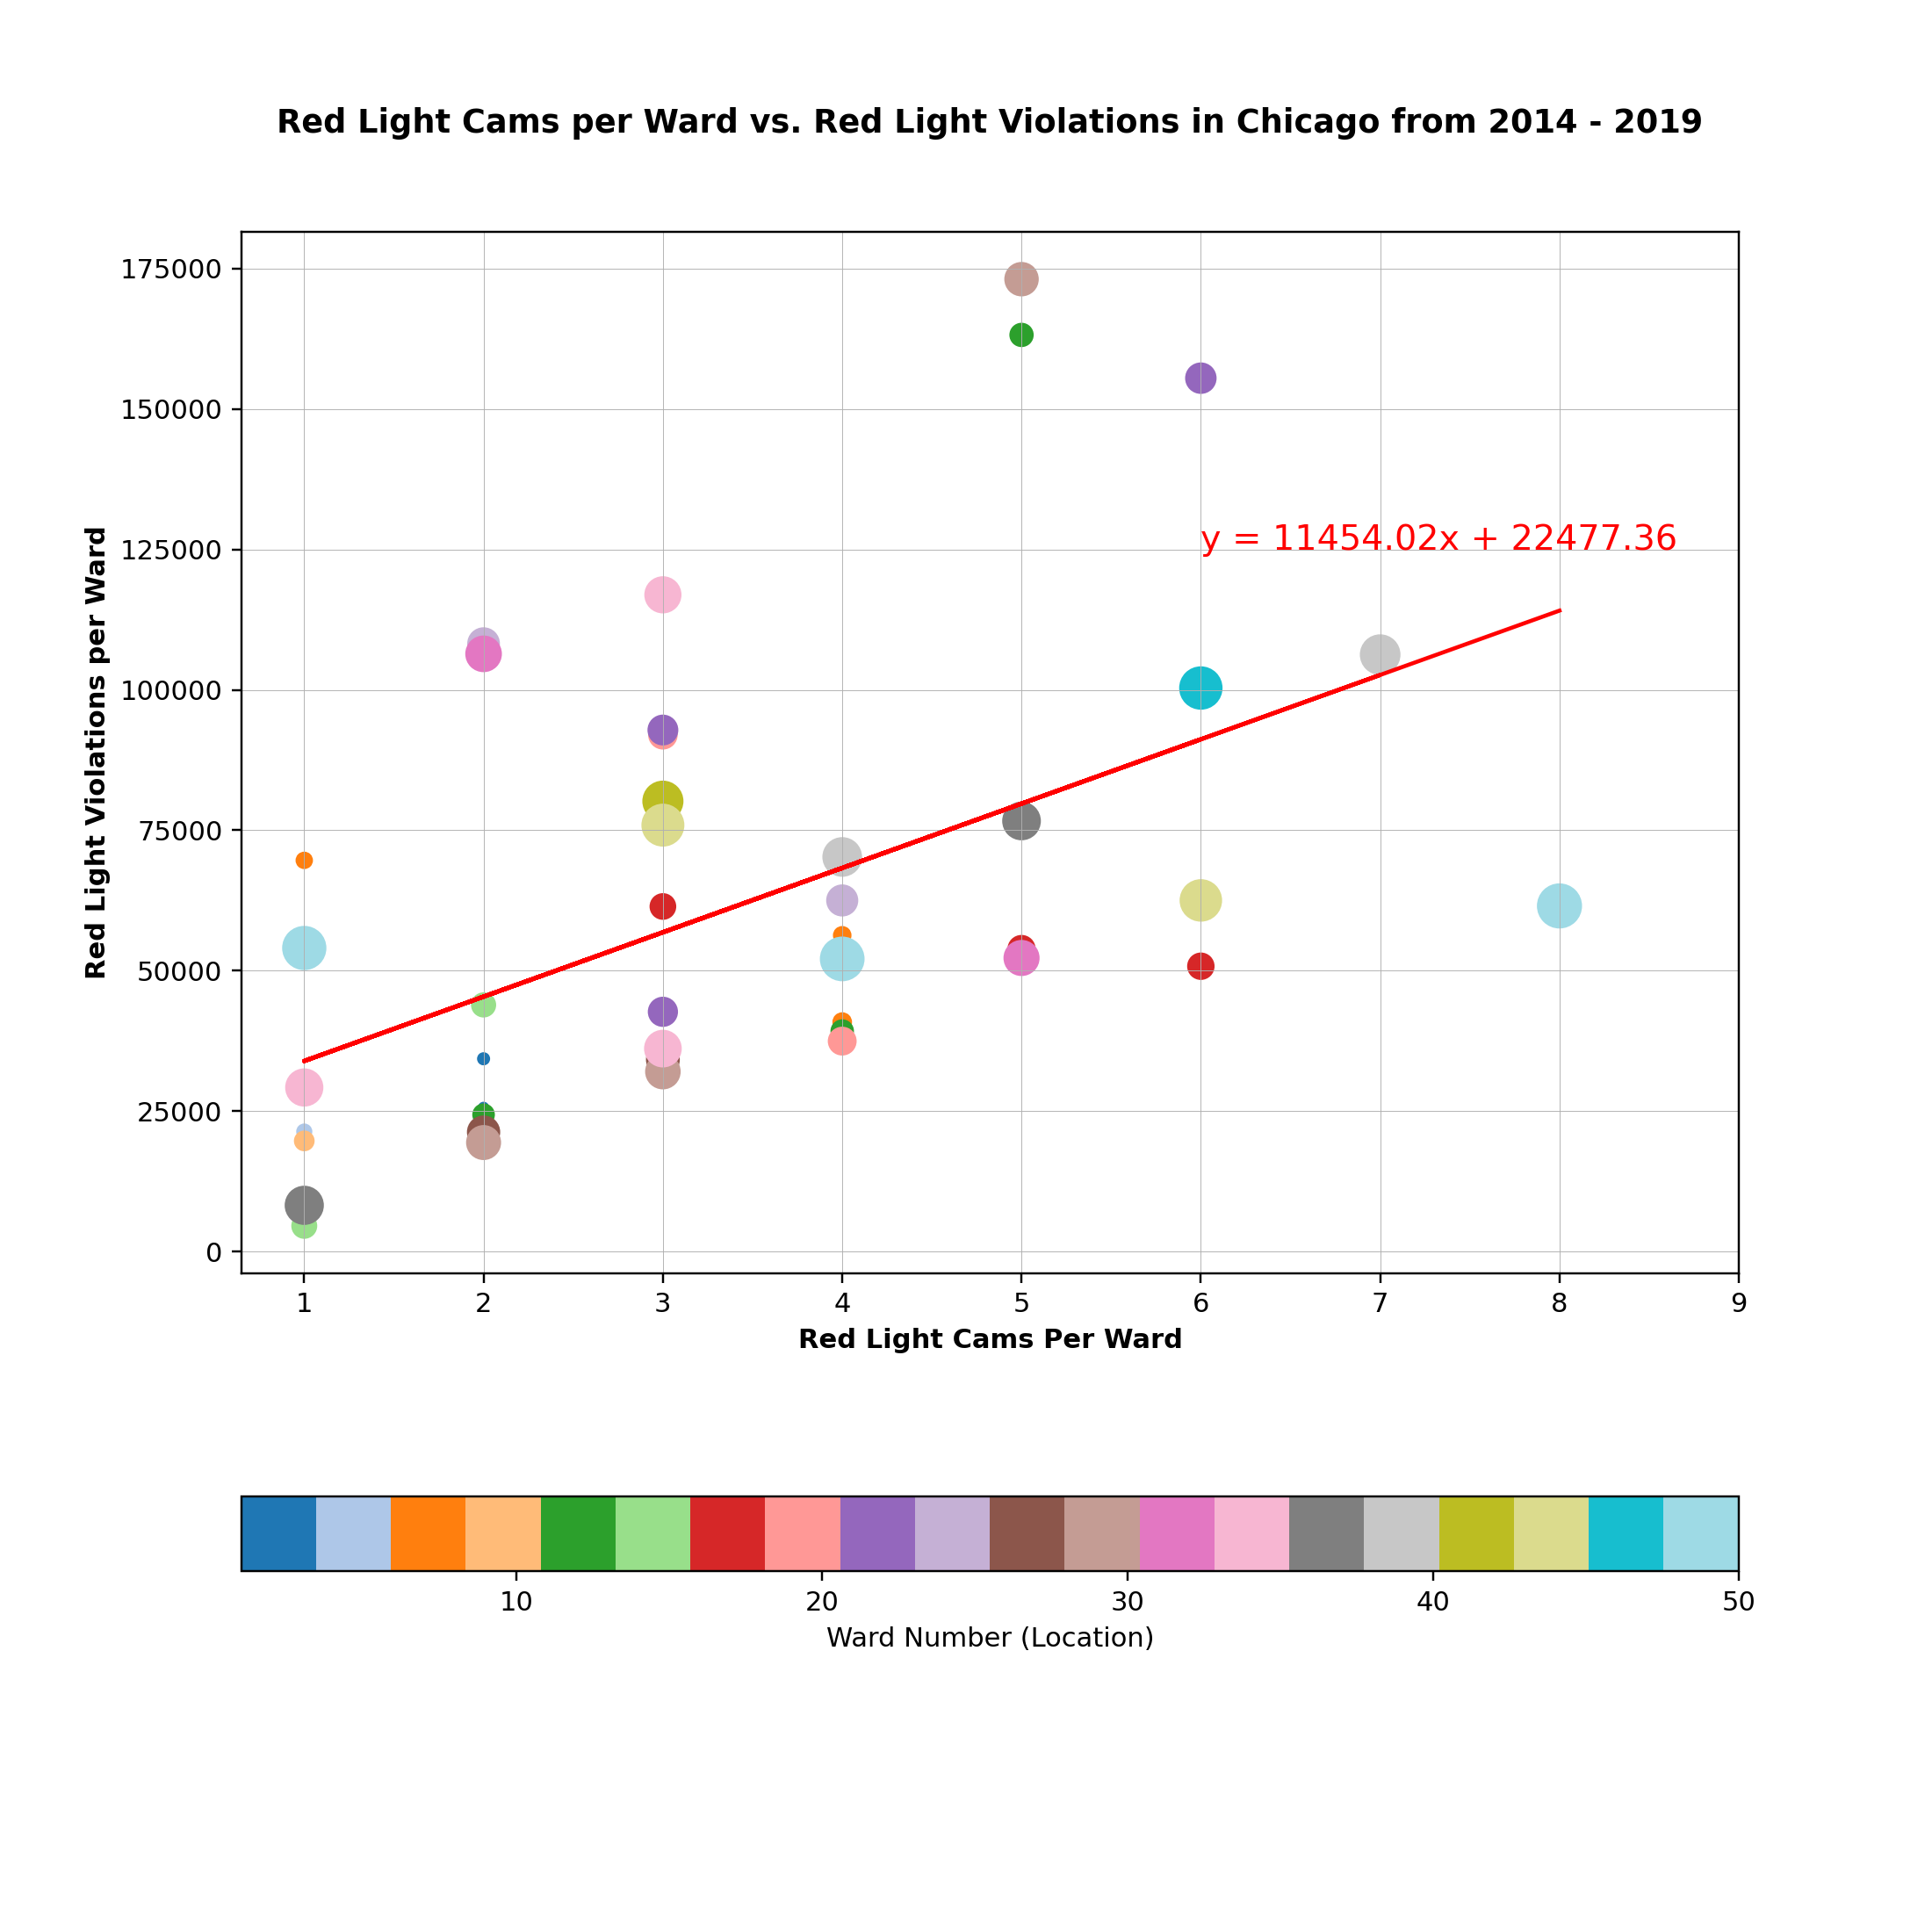

correlation coefficient : 0.52
pvalue: 0.0


In [80]:
weight= clean_df["Ward Number"]*5
arrangement = clean_df["Ward Number"]
np.arange(len(clean_df["Ward Number"]))
cmap='tab20' 
line = to_linear_regress(clean_df["Red Light Cams per Ward"], clean_df["Violations"], weight, arrangement, cmap)
to_annotate(line, 6, 125000)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Red Light Cams Per Ward", fontweight="bold")
plt.ylabel("Red Light Violations per Ward", labelpad=3.5, fontweight="bold") 
plt.title("Red Light Cams per Ward vs. Red Light Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Ward Number (Location)", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(linewidth=0.3)
plt.savefig("Images/red light violations.png")

<IPython.core.display.Javascript object>


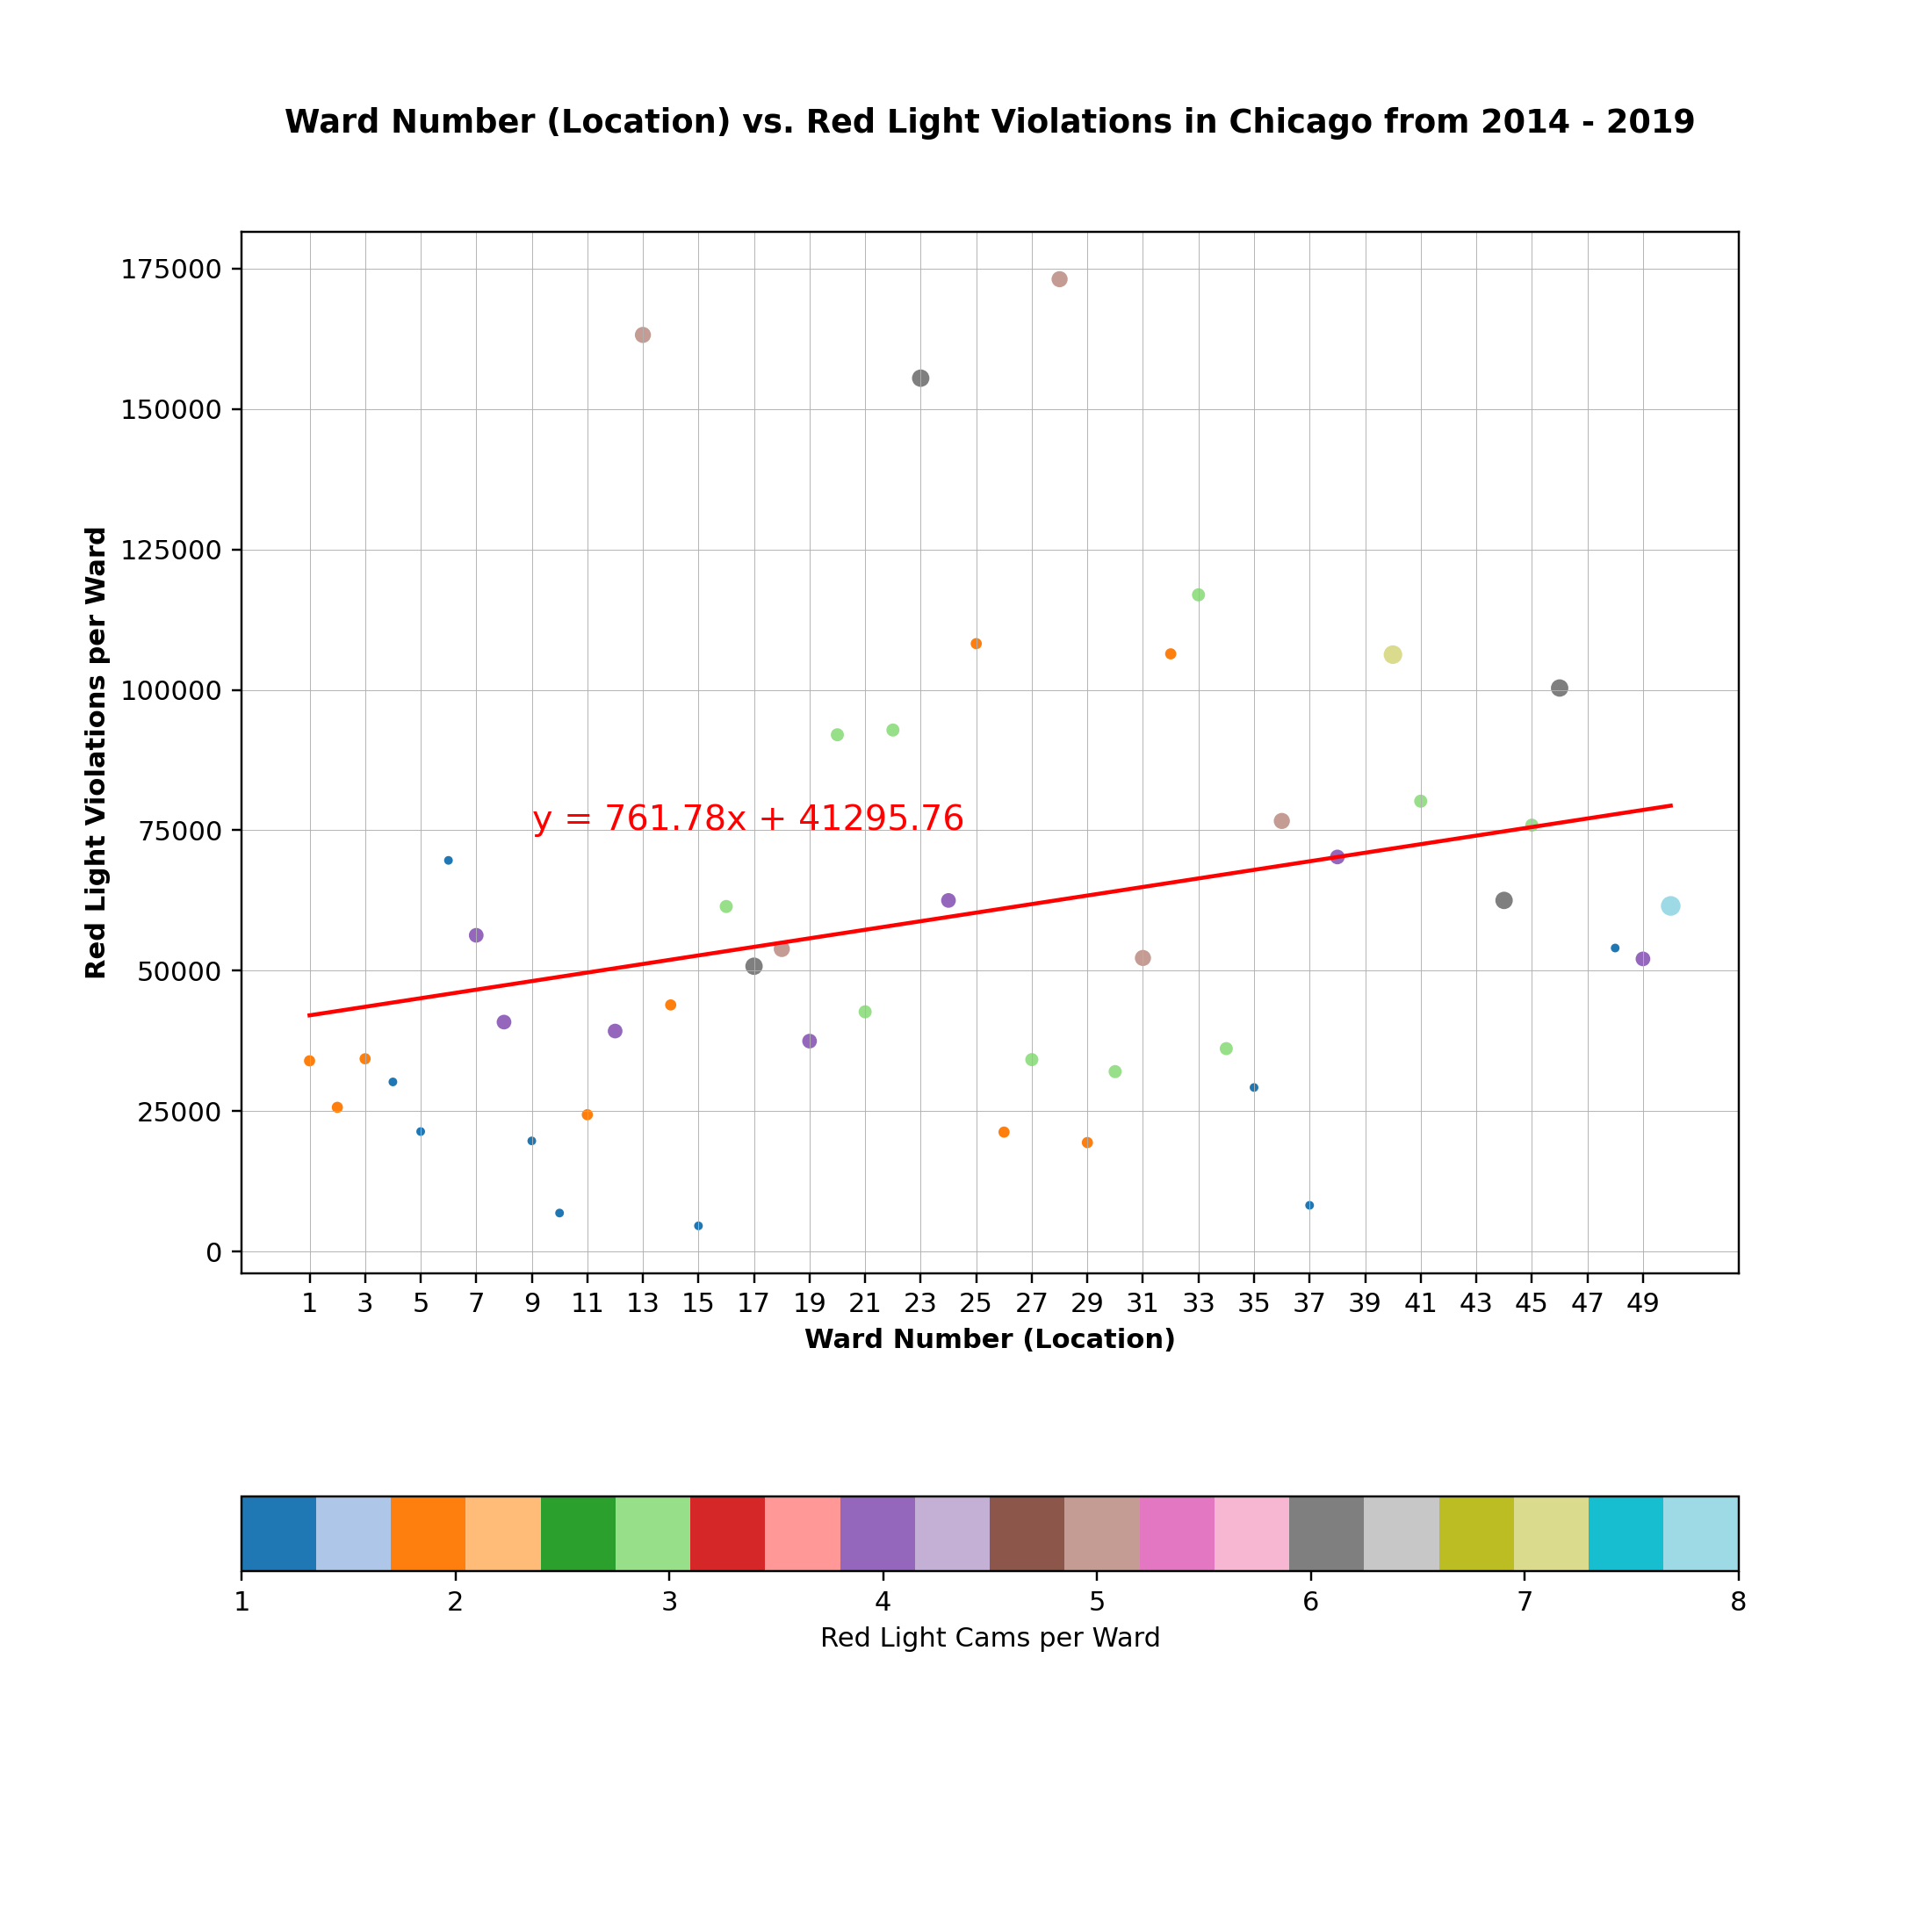

correlation coefficient : 0.27
pvalue: 0.07


In [85]:
weight= clean_df["Red Light Cams per Ward"]*5
arrangement = clean_df["Red Light Cams per Ward"]
np.arange(len(clean_df["Red Light Cams per Ward"]))
cmap='tab20' 
line = to_linear_regress(clean_df["Ward Number"], clean_df["Violations"], weight, arrangement, cmap)
to_annotate(line, 9, 75000)
plt.xticks(np.arange(1, 51, 2))
plt.xlabel("Ward Number (Location)", fontweight="bold")
plt.ylabel("Red Light Violations per Ward", labelpad=3.5, fontweight="bold") 
plt.title("Ward Number (Location) vs. Red Light Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Red Light Cams per Ward", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(linewidth=0.3)
plt.savefig("Images/red light ward.png")